In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.style.use('ggplot')
np.random.seed(123)

from scipy.stats import randint
#################
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet

from sklearn.metrics import confusion_matrix, classification_report

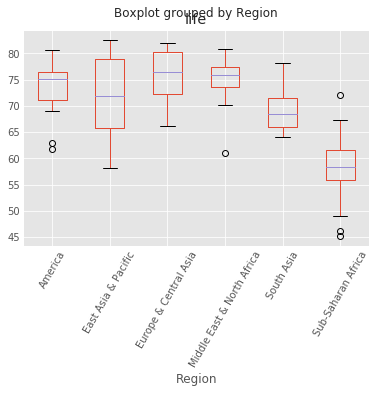

In [2]:
df = pd.read_csv('data/gm_2008_region.csv')

df.boxplot('life', 'Region', rot=60)
plt.show()

df = pd.get_dummies(df)

y = df['life']
X = df.loc[:, df.columns != 'life']
y = y.values.reshape(-1,1)

<b>Creating dummy variables</b>

As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [3]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


<b>Regression with categorical features</b>

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

In [4]:
# Import necessary modules
#from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.87032259 0.80383219 0.83638426 0.77857442 0.87021336]


<b>Dropping missing data</b>

The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [5]:
df = pd.read_csv('data/house-votes-84.csv', header=None)

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


<b>Imputing missing data in a ML Pipeline I</b>

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

In [6]:
# Import the Imputer module
#from sklearn.preprocessing import Imputer
#from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

<b>Imputing missing data in a ML Pipeline II</b>

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions.

In [7]:
df = pd.read_csv('data/house-votes-84.csv', header=None)
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.columns = columns
df[df == '?'] = np.nan
#df = df.dropna()
#df = df.reset_index(drop=True)
y = df['party']
df = df.drop('party', axis=1)

df_d = pd.get_dummies(df, drop_first=True)
df_d['party'] = y
cols = df_d.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_d = df_d[cols]
df_d.columns = columns

df = df_d

y = df['party']
X = df.loc[:, df.columns != 'party']
display(df.head())

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [8]:
# Import necessary modules
#from sklearn.preprocessing import Imputer
#from sklearn.pipeline import Pipeline
#from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



<b>Centering and scaling your data</b>

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [9]:
df = pd.read_csv('data/white-wine.csv')
display(df.head())

y = df['quality'] < 5
X = df.loc[:,df.columns != 'quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
# Import scale
#from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
dtype: float64
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


<b>Centering and scaling in a pipeline</b>

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

In [11]:
y = df['quality'] < 5
X = df.loc[:,df.columns != 'quality']

In [12]:
# Import the necessary modules
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


<h2>Bringing it all together I: Pipeline for classification</h2>

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

In [13]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
             precision    recall  f1-score   support

      False       0.97      1.00      0.98       951
       True       0.43      0.10      0.17        29

avg / total       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__gamma': 0.01, 'SVM__C': 100}


<h2>Bringing it all together II: Pipeline for regression</h2>

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

In [14]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.03467831194788973


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
